# La détection de l’état des yeux

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, BatchNormalization,
    Dense, Flatten, Dropout
)
from keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [49]:
# -------------------------
# Configuration
# -------------------------
IMG_SIZE = (64, 64)
BATCH_SIZE = 64
EPOCHS = 30
DATA_DIR = "/kaggle/input/eyestate-yawndrowsiness-dataset/data/eyes"

# -------------------------
# Data Generators
# -------------------------
# train_gen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=5,
#     width_shift_range=0.05,
#     height_shift_range=0.05,
#     zoom_range=0.05
# )
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,           # Augmenté de 5 à 15
    width_shift_range=0.1,       # Augmenté de 0.05 à 0.1
    height_shift_range=0.1,      # Augmenté de 0.05 à 0.1
    zoom_range=0.1,              # Augmenté de 0.05 à 0.1
    fill_mode='nearest'
)

val_test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    f"{DATA_DIR}/train",
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_data = val_test_gen.flow_from_directory(
    f"{DATA_DIR}/val",
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_data = val_test_gen.flow_from_directory(
    f"{DATA_DIR}/test",
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

Found 53843 images belonging to 2 classes.
Found 17950 images belonging to 2 classes.
Found 17951 images belonging to 2 classes.


In [50]:
# -------------------------
# CNN Model (Lightweight)
# -------------------------
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(64,64,1)),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Dropout(0.2), 

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Dropout(0.3), 

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Dropout(0.4),

    Flatten(),
    Dense(64, activation='relu',kernel_regularizer=l2(1e-4)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [51]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 31, 31, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,329 (669.25 KB)

 Trainable params: 171,105 (668.38 KB)

 Non-trainable params: 224 (896.00 B)

In [52]:
# -------------------------
# Callbacks
# -------------------------
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(
        "/kaggle/working/eye_state_classifier.h5",
        monitor='val_accuracy',
        save_best_only=True
    ),
     ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,               # Réduit le LR de moitié
        patience=3,               # Attends 3 époques sans amélioration
        min_lr=1e-7,              # LR minimum
        verbose=1
    )
]

In [53]:
# -------------------------
# Training
# -------------------------
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8143 - loss: 0.4766

842/842 ━━━━━━━━━━━━━━━━━━━━ 149s 169ms/step - accuracy: 0.8144 - loss: 0.4764 - val_accuracy: 0.9466 - val_loss: 0.1532 - learning_rate: 0.0010
Epoch 2/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9300 - loss: 0.2050

842/842 ━━━━━━━━━━━━━━━━━━━━ 140s 167ms/step - accuracy: 0.9300 - loss: 0.2049 - val_accuracy: 0.9578 - val_loss: 0.1394 - learning_rate: 0.0010
Epoch 3/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 145s 172ms/step - accuracy: 0.9522 - loss: 0.1548 - val_accuracy: 0.9425 - val_loss: 0.1716 - learning_rate: 0.0010
Epoch 4/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9575 - loss: 0.1383

842/842 ━━━━━━━━━━━━━━━━━━━━ 144s 171ms/step - accuracy: 0.9575 - loss: 0.1383 - val_accuracy: 0.9733 - val_loss: 0.0948 - learning_rate: 0.0010
Epoch 5/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 138s 164ms/step - accuracy: 0.9619 - loss: 0.1286 - val_accuracy: 0.9666 - val_loss: 0.1189 - learning_rate: 0.0010
Epoch 6/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 140s 166ms/step - accuracy: 0.9651 - loss: 0.1231 - val_accuracy: 0.9728 - val_loss: 0.0998 - learning_rate: 0.0010
Epoch 7/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9669 - loss: 0.1211
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
842/842 ━━━━━━━━━━━━━━━━━━━━ 136s 161ms/step - accuracy: 0.9669 - loss: 0.1211 - val_accuracy: 0.9711 - val_loss: 0.1133 - learning_rate: 0.0010
Epoch 8/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9716 - loss: 0.1074

842/842 ━━━━━━━━━━━━━━━━━━━━ 132s 156ms/step - accuracy: 0.9716 - loss: 0.1074 - val_accuracy: 0.9843 - val_loss: 0.0684 - learning_rate: 5.0000e-04
Epoch 9/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 133s 158ms/step - accuracy: 0.9721 - loss: 0.1011 - val_accuracy: 0.9801 - val_loss: 0.0778 - learning_rate: 5.0000e-04
Epoch 10/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9741 - loss: 0.0956

842/842 ━━━━━━━━━━━━━━━━━━━━ 128s 152ms/step - accuracy: 0.9741 - loss: 0.0956 - val_accuracy: 0.9846 - val_loss: 0.0680 - learning_rate: 5.0000e-04
Epoch 11/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9753 - loss: 0.0928

842/842 ━━━━━━━━━━━━━━━━━━━━ 131s 155ms/step - accuracy: 0.9753 - loss: 0.0928 - val_accuracy: 0.9847 - val_loss: 0.0648 - learning_rate: 5.0000e-04
Epoch 12/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 133s 158ms/step - accuracy: 0.9740 - loss: 0.0946 - val_accuracy: 0.9796 - val_loss: 0.0765 - learning_rate: 5.0000e-04
Epoch 13/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9760 - loss: 0.0919

842/842 ━━━━━━━━━━━━━━━━━━━━ 134s 159ms/step - accuracy: 0.9760 - loss: 0.0919 - val_accuracy: 0.9862 - val_loss: 0.0639 - learning_rate: 5.0000e-04
Epoch 14/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 132s 157ms/step - accuracy: 0.9754 - loss: 0.0900 - val_accuracy: 0.9843 - val_loss: 0.0639 - learning_rate: 5.0000e-04
Epoch 15/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 133s 158ms/step - accuracy: 0.9744 - loss: 0.0920 - val_accuracy: 0.9855 - val_loss: 0.0585 - learning_rate: 5.0000e-04
Epoch 16/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 132s 157ms/step - accuracy: 0.9782 - loss: 0.0847 - val_accuracy: 0.9852 - val_loss: 0.0593 - learning_rate: 5.0000e-04
Epoch 17/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 137s 163ms/step - accuracy: 0.9760 - loss: 0.0895 - val_accuracy: 0.9737 - val_loss: 0.1124 - learning_rate: 5.0000e-04
Epoch 18/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.9752 - loss: 0.0874


Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
842/842 ━━━━━━━━━━━━━━━━━━━━ 135s 160ms/step - accuracy: 0.9752 - loss: 0.0874 - val_accuracy: 0.9863 - val_loss: 0.0605 - learning_rate: 5.0000e-04
Epoch 19/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 137s 162ms/step - accuracy: 0.9779 - loss: 0.0835 - val_accuracy: 0.9857 - val_loss: 0.0589 - learning_rate: 2.5000e-04
Epoch 20/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 135s 161ms/step - accuracy: 0.9792 - loss: 0.0773 - val_accuracy: 0.9856 - val_loss: 0.0587 - learning_rate: 2.5000e-04


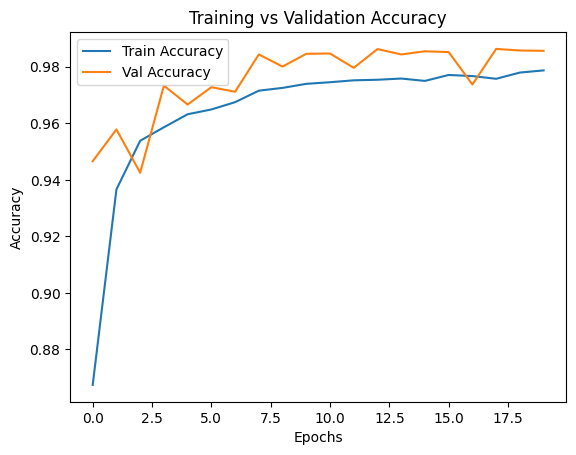

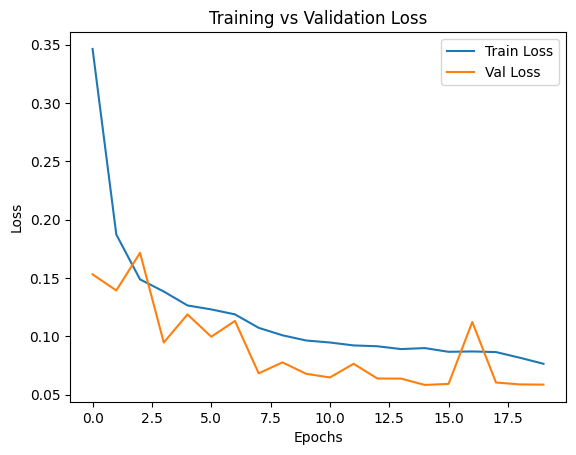

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
# Sauvegarde la figure avant de l'afficher
plt.savefig('/kaggle/working/train_val_accuracy.png')
plt.show()


# Loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
# Sauvegarde la figure avant de l'afficher
plt.savefig('/kaggle/working/train_val_loss.png')
plt.show()


- **Interprétation :** `Training vs Validation Loss`
    - Train loss descend régulièrement jusqu'à ~0.05
    - Val loss suit parfaitement, descend jusqu'à ~0.07
    - Écart minimal → pas de surapprentissage
    - Convergence stable → modèle bien régularisé
    - *Conclusion :* Le modèle apprend sans mémoriser les données d'entraînement

- **Interprétation :** ` Training vs Validation Accuracy`
    - Train accuracy atteint ~0.98
    - Val accuracy atteint 0.96 et reste stable
    - Écart < 2% → excellente généralisation
    - Pas de descente après epoch 10 → pas d'overfitting
    - *Conclusion :* Le modèle généralise presque aussi bien qu'il apprend



In [55]:
# -------------------------
# Evaluation
# -------------------------
test_loss, test_acc = model.evaluate(test_data)
print(f"\nTest Accuracy: {test_acc:.4f}")

281/281 ━━━━━━━━━━━━━━━━━━━━ 44s 157ms/step - accuracy: 0.9839 - loss: 0.0631

Test Accuracy: 0.9867


281/281 ━━━━━━━━━━━━━━━━━━━━ 28s 98ms/step


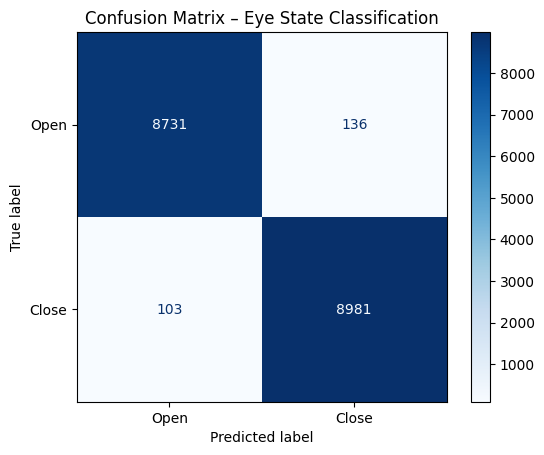

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
y_pred_probs = model.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()

# True labels
y_true = test_data.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Open", "Close"]
)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Eye State Classification")
plt.savefig('/kaggle/working/confusion_matrix.png')
plt.show()


- **Interprétation :** `Confusion Matrix `
    - Accuracy test : 98.67% → exceptionnel
    - Erreurs équilibrées :
        - 103 yeux fermés → ouverts (1.16% d'erreurs critiques)
        - 136 yeux ouverts → fermés (1.49% de fausses alarmes)
    - Classes équilibrées (≈50/50) → pas de biais
    - **Conclusion :** Prêt pour le déploiement réel